In [4]:
# Deprecated.
#%%file visualize_aperture.py
# Visualize aperture.
# 20 classes, 11 test datasets, 20 images.
from constant import *
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import sys
import time
import cPickle
import argparse

#### Parameters ####
gpu = 0
model_type_str = 'aperture'
net_name = 'all'
test_type_str = 'aperture'
test_dataset = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
####################

import caffe

caffe.set_device(gpu)
caffe.set_mode_gpu()

print 'Processing: finetune_alexnet_{}_{} on GPU {}, test on {}'.format(model_type_str, net_name, gpu, test_type_str)

net = caffe.Net(result_root + 'model/finetune_alexnet_{}_{}/deploy.prototxt'.format(model_type_str, net_name),
                result_root + 'model/finetune_alexnet_{}_{}/finetune_alexnet_{}_{}.caffemodel'.format(model_type_str, net_name, model_type_str, net_name),
                caffe.TEST)
# input preprocessing: 'data' is the name of the input blob == net.inputs[0]
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1)) # mean pixel
transformer.set_raw_scale('data', 255)  # the reference model operates on images in [0,255] range instead of [0,1]
transformer.set_channel_swap('data', (2,1,0))  # the reference model has channels in BGR order instead of RGB

# set net to batch size of 50
net.blobs['data'].reshape(50,3,227,227)

top_images = [[[] for i in test_dataset] for i in range(20)]
# images[class_id][dataset_size][..] = (confidence, img_path)

positive_true = [[0 for i in test_dataset] for i in range(20)]
image_sum = [[0 for i in test_dataset] for i in range(20)]
class_accuracy = [[0.0 for i in test_dataset] for i in range(20)]

start_time = time.time()
for index, test_name in enumerate(test_dataset):
    now_time = time.strftime("%H:%M:%S", time.gmtime(int(time.time() - start_time)))
    print '[{}] Processing dataset: {}'.format(now_time, test_name)
    test_file = open('{}dataset/test_{}_{}.txt'.format(imagenet_root, test_type_str, test_name), 'r')
    lines = test_file.readlines()
    i_sum = len(lines)
    for i, line in enumerate(lines):
        image_path, class_id = line.split(' ')
        class_id = int(class_id)
        net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image(image_path))
        out = net.forward()
        
        predict_id = out['prob'][0].argmax()
        if class_id == predict_id:
            positive_true[class_id][index] += 1
        image_sum[class_id][index] += 1
        
        top_images[class_id][index].append((out['prob'][0][class_id], image_path))
        
        now_time = time.strftime("%H:%M:%S", time.gmtime(int(time.time() - start_time)))
        if i % 1000 == 0:
            print '[{}] {:5}/{:5}: {} {}'.format(now_time, i, i_sum, image_path, out['prob'][0][class_id])

for class_id in range(20):
    for test_index in range(len(test_dataset)):
        class_accuracy[class_id][test_index] = float(positive_true[class_id][test_index]) / image_sum[class_id][test_index]
            
for class_id in range(20):
    for test_id in range(len(test_dataset)):
        top_images[class_id][test_id] = sorted(top_images[class_id][test_id], reverse = True)

with open(result_root + 'test/top_images.pickle', 'wb') as f:
    cPickle.dump(top_images, f)
with open(result_root + 'test/class_accuracy.pickle', 'wb') as f:
    cPickle.dump(class_accuracy, f)
    
print 'done'

Writing visualize_aperture.py


Class 13: minivan
------------------------------------------------------------------------
Aperture size: 0
(0.052567627, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_0/n03770679_9924_aperture_0_0_0_0.jpeg')


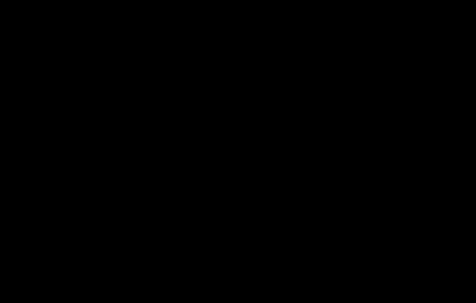

(0.052567627, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_0/n03770679_9912_aperture_0_0_0_0.jpeg')


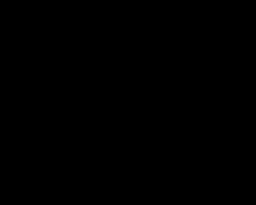

------------------------------------------------------------------------
Aperture size: 10
(0.25884563, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_10/n03770679_10496_aperture_0_10_2_3.jpeg')


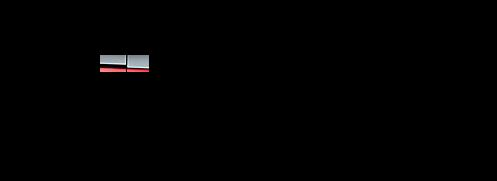

(0.24064441, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_10/n03770679_4018_aperture_0_10_5_3.jpeg')


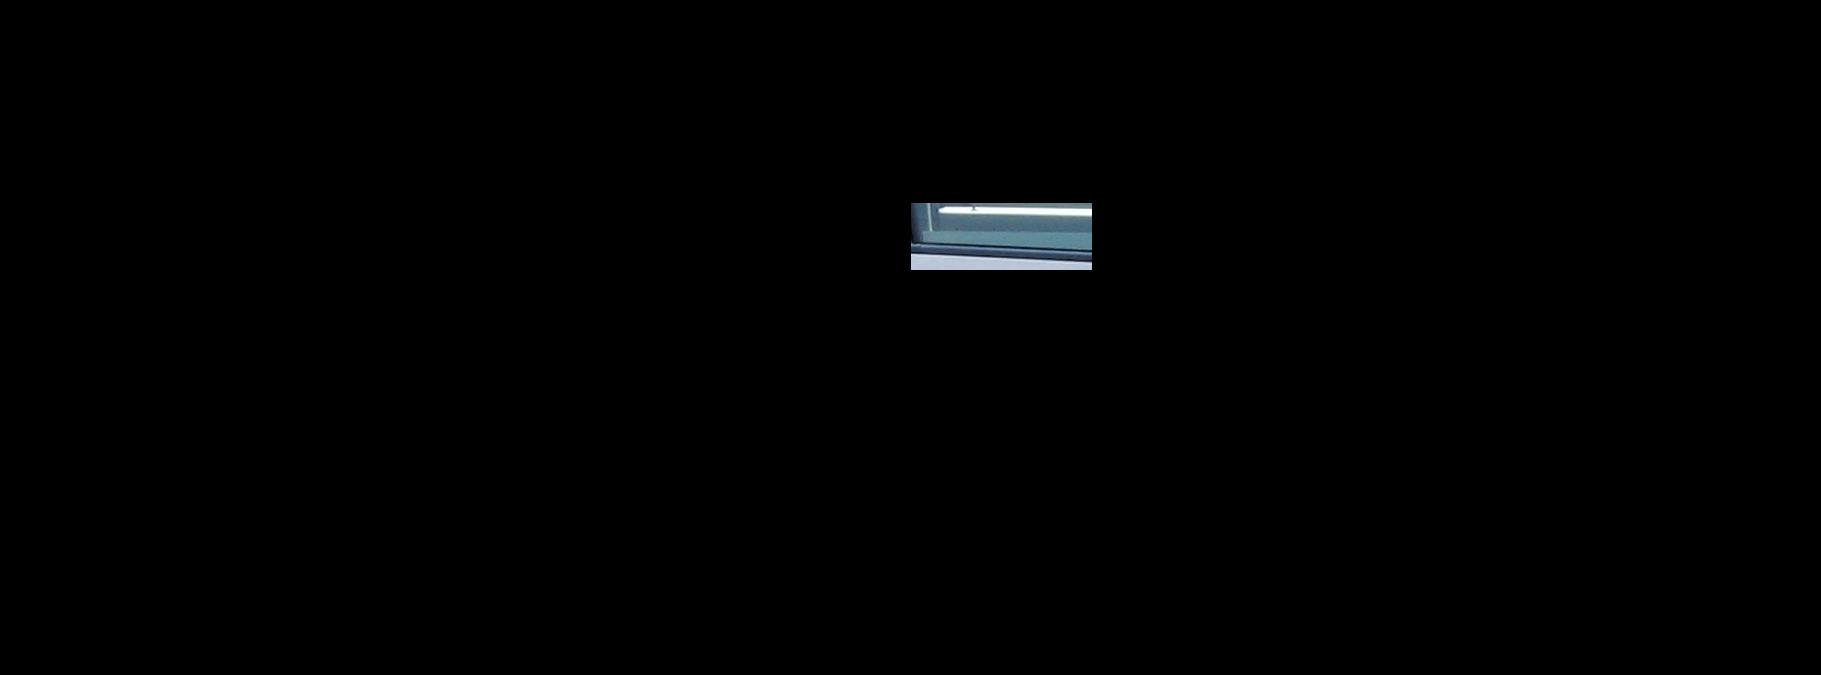

------------------------------------------------------------------------
Aperture size: 20
(0.88610137, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_20/n03770679_9723_aperture_0_20_3_2.jpeg')


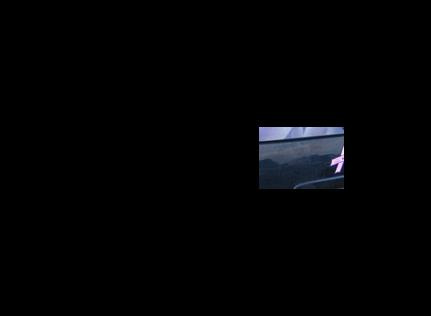

(0.87039828, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_20/n03770679_21480_aperture_0_20_4_3.jpeg')


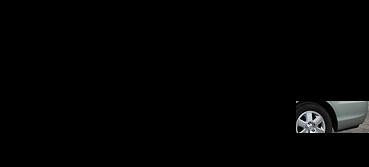

------------------------------------------------------------------------
Aperture size: 30
(0.99823725, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_30/n03770679_15733_aperture_0_30_3_2.jpeg')


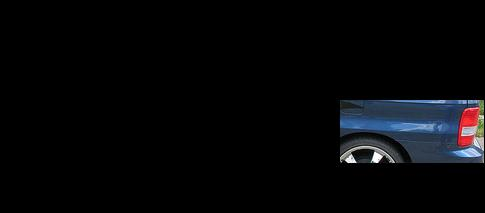

(0.99725467, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_30/n03770679_1337_aperture_0_30_3_2.jpeg')


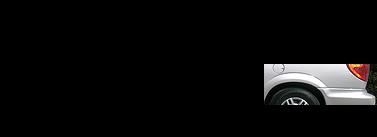

------------------------------------------------------------------------
Aperture size: 40
(0.99927801, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_40/n03770679_12850_aperture_0_40_1_2.jpeg')


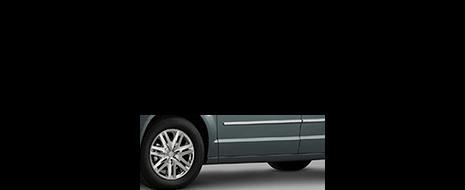

(0.99905628, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_40/n03770679_3576_aperture_0_40_1_2.jpeg')


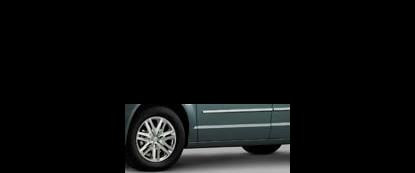

------------------------------------------------------------------------
Aperture size: 50
(0.99997902, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_50/n03770679_21480_aperture_0_50_2_1.jpeg')


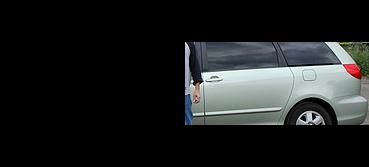

(0.99996161, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_50/n03770679_10052_aperture_0_50_0_1.jpeg')


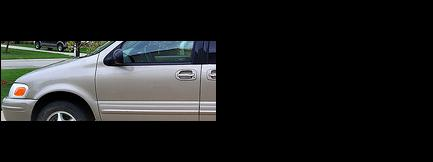

------------------------------------------------------------------------
Aperture size: 60
(0.99999702, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_60/n03770679_21480_aperture_0_60_2_1.jpeg')


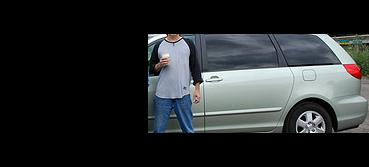

(0.99999022, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_60/n03770679_21480_aperture_0_60_2_0.jpeg')


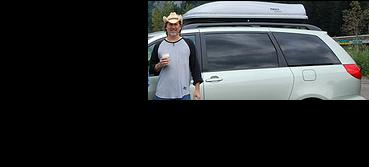

------------------------------------------------------------------------
Aperture size: 70
(1.0, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_70/n03770679_21480_aperture_0_70_2_1.jpeg')


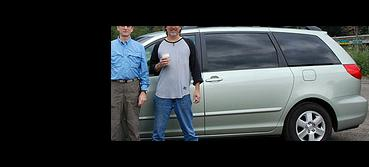

(0.99999988, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_70/n03770679_21480_aperture_0_70_2_0.jpeg')


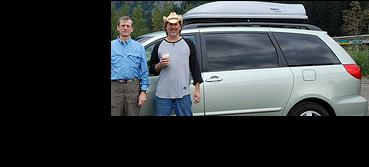

------------------------------------------------------------------------
Aperture size: 80
(1.0, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_80/n03770679_21480_aperture_0_80_2_1.jpeg')


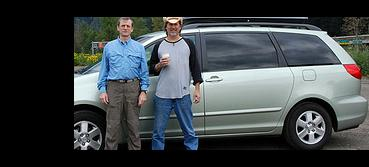

(1.0, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_80/n03770679_21480_aperture_0_80_2_0.jpeg')


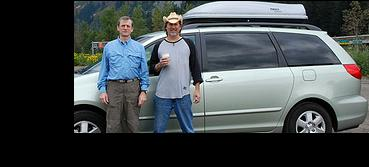

------------------------------------------------------------------------
Aperture size: 90
(1.0, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_90/n03770679_4831_aperture_0_90_2_2.jpeg')


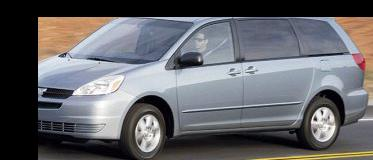

(1.0, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_90/n03770679_4831_aperture_0_90_2_1.jpeg')


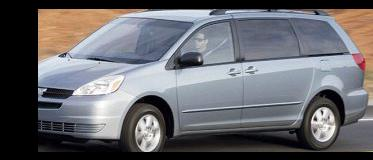

------------------------------------------------------------------------
Aperture size: 100
(1.0, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_100/n03770679_4831_aperture_0_100_0_0.jpeg')


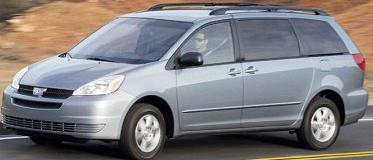

(1.0, '/home/haow3/occlusion-project/data/imagenet/dataset/test_aperture_100/n03770679_4758_aperture_0_100_0_0.jpeg')


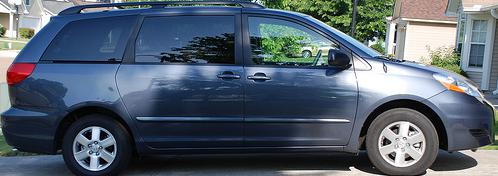

In [2]:
# Show some top images.
from constant import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import cPickle
from IPython.display import Image, display

imagenet_labels_filename = caffe_root + 'data/ilsvrc12/synset_words.txt'
with open(imagenet_labels_filename) as f:
    lines = f.readlines()
id_to_name = {}
for i, line in enumerate(lines):
    wnid = line.split(' ')[0]
    name = line[(len(wnid) + 1):-1]
    id_to_name[i] = name

with open(result_root + 'test/top_images.pickle', 'rb') as f:
    top_images = cPickle.load(f)

test_dataset = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
    
for class_id in range(20):
    if class_id != 13:
        continue
    print '===================================================================================================='
    print 'Class {}: {}'.format(class_id, id_to_name[new_to_original_class_id[class_id]])
    for test_size in range(len(test_dataset)):
        print '------------------------------------------------------------------------'
        print 'Aperture size: {}'.format(test_dataset[test_size]) 
        for i in range(2):
            print top_images[class_id][test_size][i]
            display(Image(filename=top_images[class_id][test_size][i][1]))

All classes: 


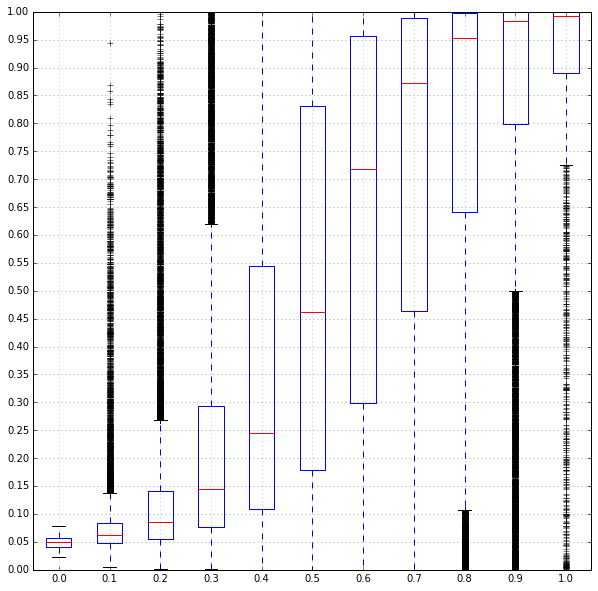

Class 0: goose
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.13016095171448566, 0.1371588523442967, 0.258086717136958, 0.3736111111111111, 0.4847222222222222, 0.6131944444444445, 0.7090277777777778, 0.7701388888888889, 0.7986111111111112, 0.81875]


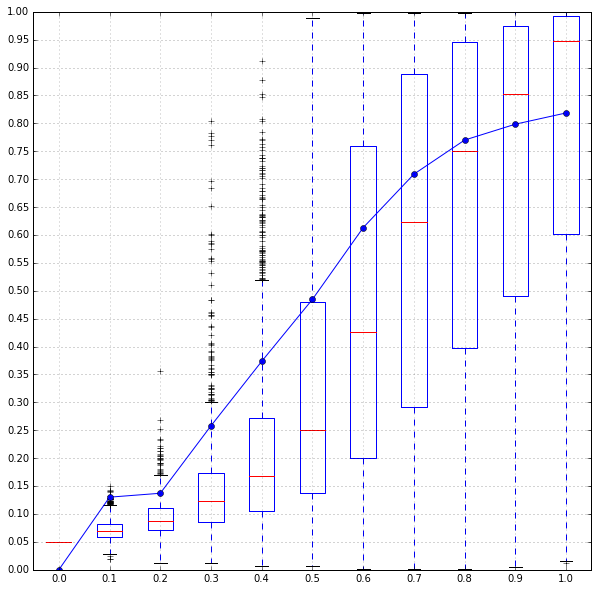

Class 1: snail
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.04581497797356828, 0.15017985611510792, 0.2795992714025501, 0.4480578139114724, 0.6178861788617886, 0.7280939476061428, 0.7949412827461608, 0.8383017163504969, 0.8690153568202349, 0.9186991869918699]


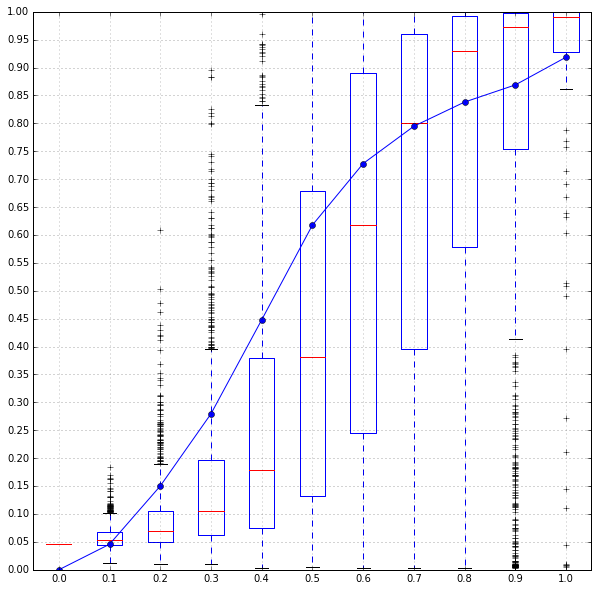

Class 2: American egret, great white heron, Egretta albus
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.10273224043715846, 0.2893013100436681, 0.47654584221748403, 0.6375404530744336, 0.7292340884573895, 0.8015102481121898, 0.8338727076591155, 0.8629989212513485, 0.9115426105717368, 0.912621359223301]


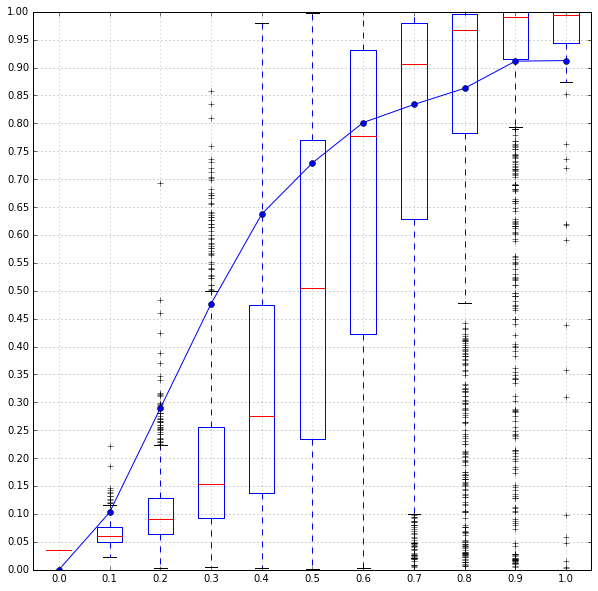

Class 3: pelican
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.061585835257890686, 0.16471449487554904, 0.2690909090909091, 0.3833701250919794, 0.5224429727740986, 0.6696100073583517, 0.7689477557027226, 0.82560706401766, 0.8616629874908021, 0.8874172185430463]


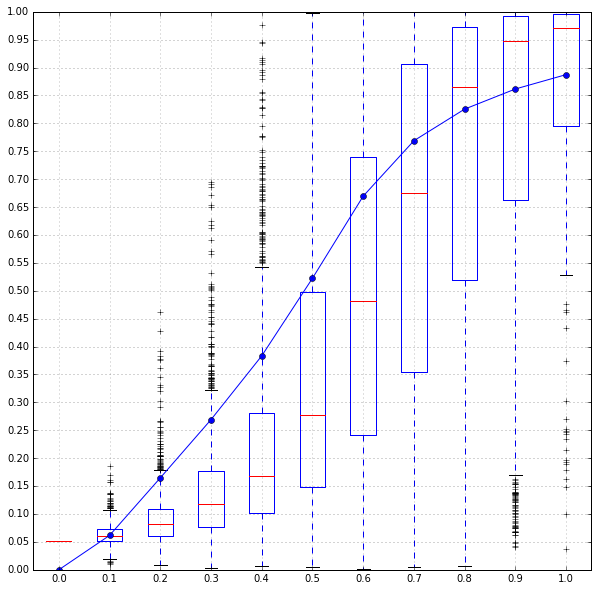

Class 4: admiral
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.2837528604118993, 0.46938775510204084, 0.6595982142857143, 0.8344444444444444, 0.9322222222222222, 0.9844444444444445, 0.9988888888888889, 1.0, 0.9955555555555555, 1.0]


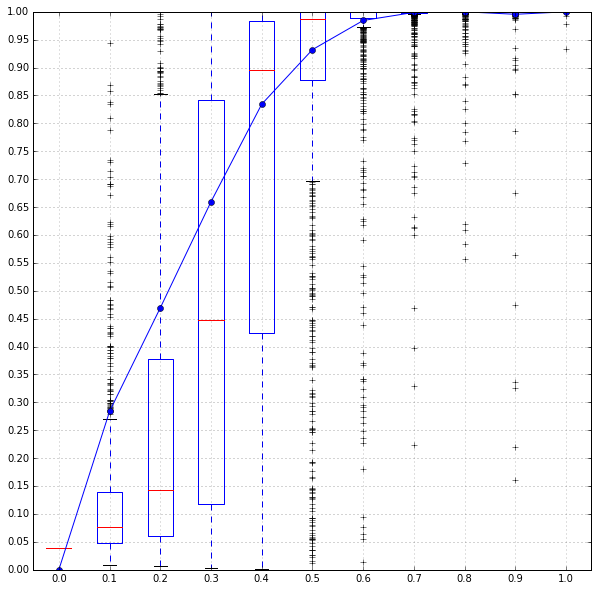

Class 5: hippopotamus, hippo, river horse, Hippopotamus amphibius
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.15269461077844312, 0.33125, 0.5894632206759444, 0.6554536187563711, 0.7492354740061162, 0.8114169215086646, 0.8827726809378186, 0.928644240570846, 0.9510703363914373, 0.981651376146789]


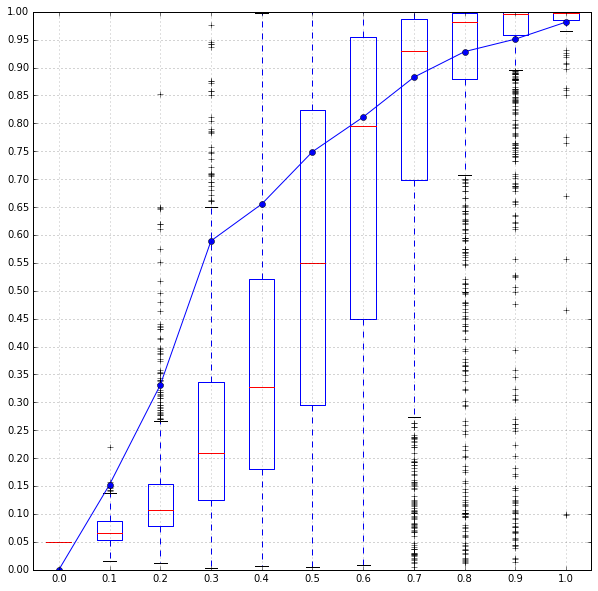

Class 6: African elephant, Loxodonta africana
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.28560126582278483, 0.46197411003236244, 0.5613057324840764, 0.676984126984127, 0.7849206349206349, 0.8420634920634921, 0.8785714285714286, 0.9230158730158731, 0.9412698412698413, 0.95]


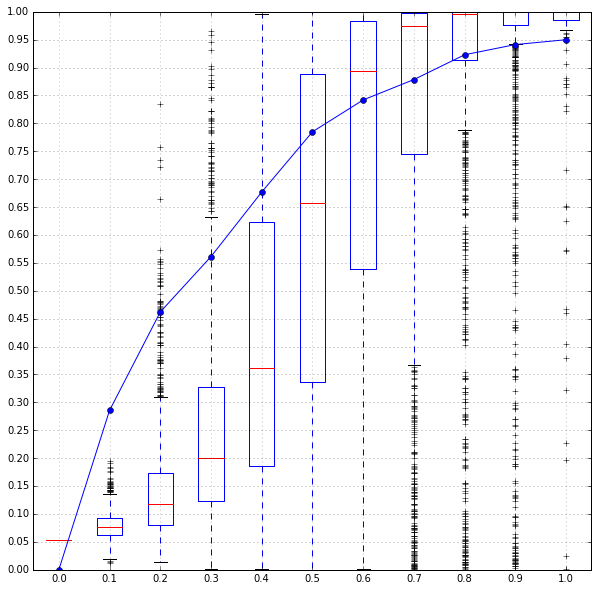

Class 7: chime, bell, gong
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.07040816326530612, 0.19476439790575917, 0.2854077253218884, 0.4264550264550265, 0.5396825396825397, 0.6444444444444445, 0.7417989417989418, 0.8105820105820106, 0.8613756613756614, 0.8857142857142857]


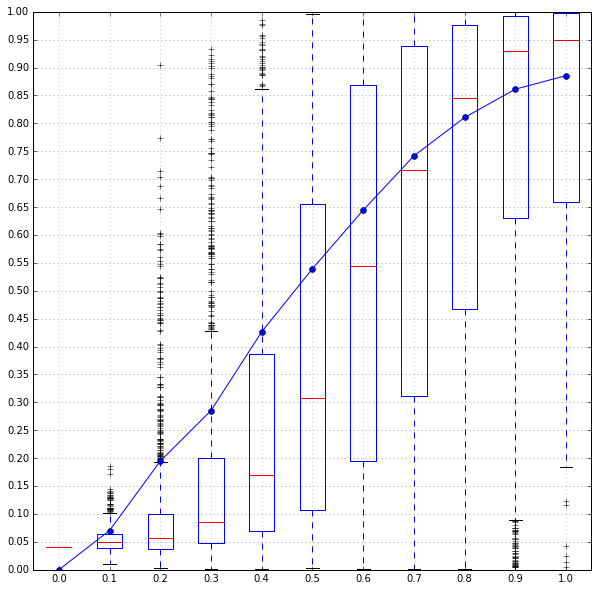

Class 8: church, church building
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.22115384615384615, 0.3220524017467249, 0.5164021164021164, 0.6877777777777778, 0.7966666666666666, 0.8755555555555555, 0.9133333333333333, 0.9422222222222222, 0.9688888888888889, 0.98]


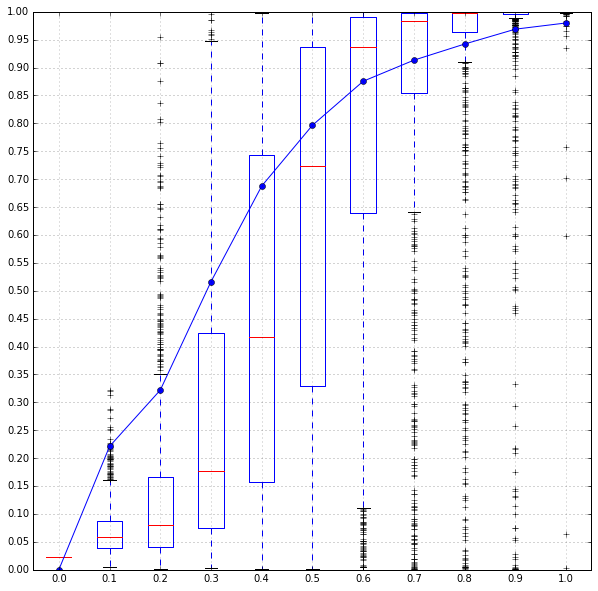

Class 9: corkscrew, bottle screw
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.02620545073375262, 0.10654008438818566, 0.18854166666666666, 0.2762487257900102, 0.42813455657492355, 0.5535168195718655, 0.6432212028542303, 0.7064220183486238, 0.764525993883792, 0.8165137614678899]


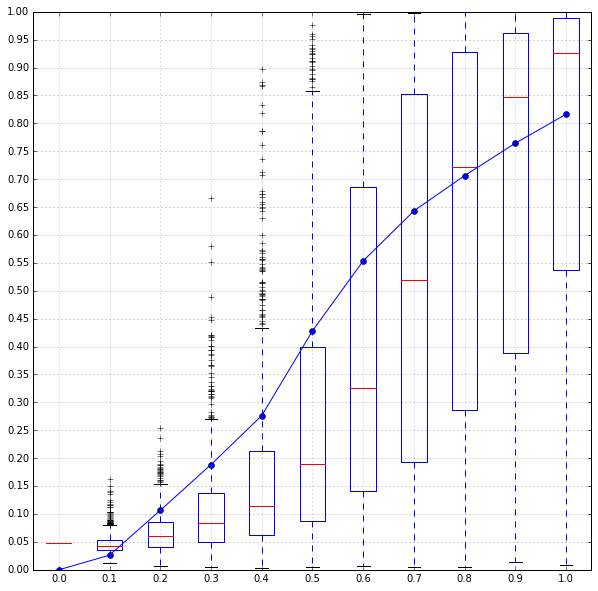

Class 10: dam, dike, dyke
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.06929637526652452, 0.3439829605963791, 0.45260915867944623, 0.5876068376068376, 0.6923076923076923, 0.7980769230769231, 0.8664529914529915, 0.9145299145299145, 0.9508547008547008, 0.9711538461538461]


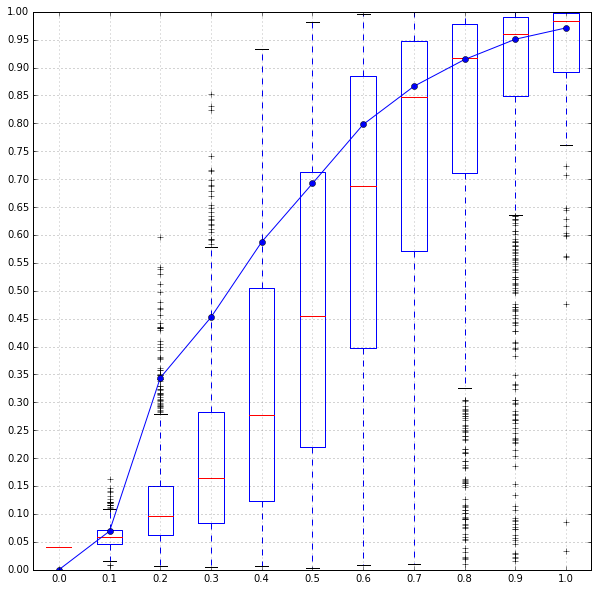

Class 11: desk
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.2961876832844575, 0.29206963249516443, 0.48326771653543305, 0.6346346346346347, 0.7617617617617618, 0.8188188188188188, 0.8608608608608609, 0.8788788788788788, 0.91991991991992, 0.954954954954955]


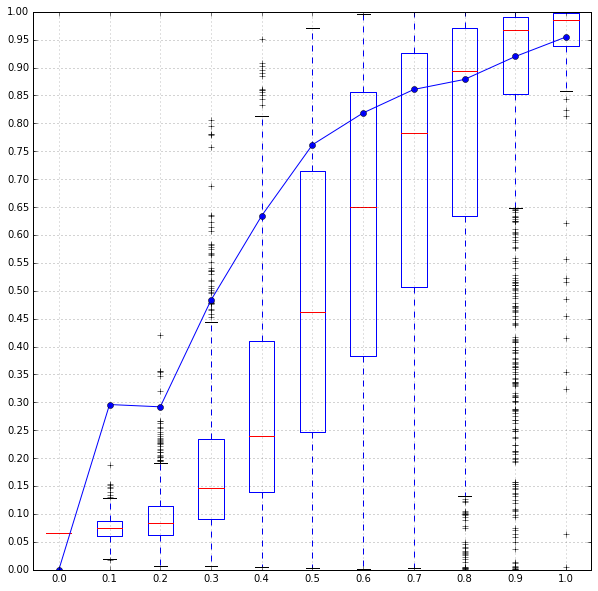

Class 12: microphone, mike
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1.0, 0.28281750266808964, 0.25666337611056267, 0.30186721991701243, 0.38686868686868686, 0.41818181818181815, 0.5181818181818182, 0.6202020202020202, 0.6616161616161617, 0.6989898989898989, 0.8]


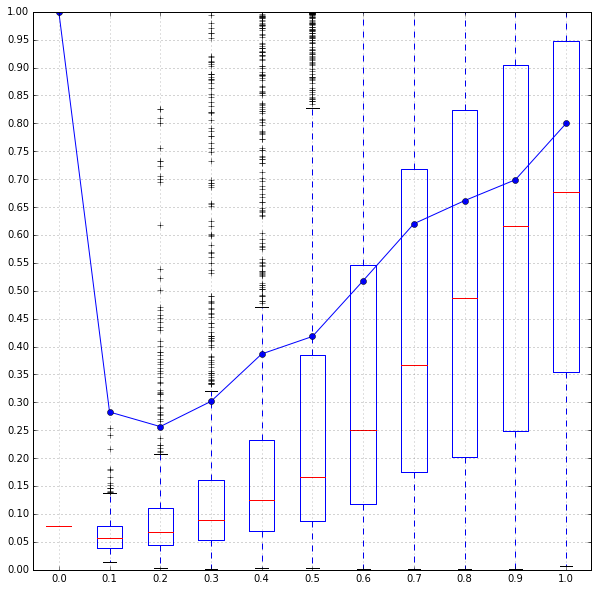

Class 13: minivan
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.2047817047817048, 0.3365180467091295, 0.53099173553719, 0.7165109034267912, 0.822429906542056, 0.8691588785046729, 0.8847352024922118, 0.9283489096573209, 0.9615784008307373, 0.9813084112149533]


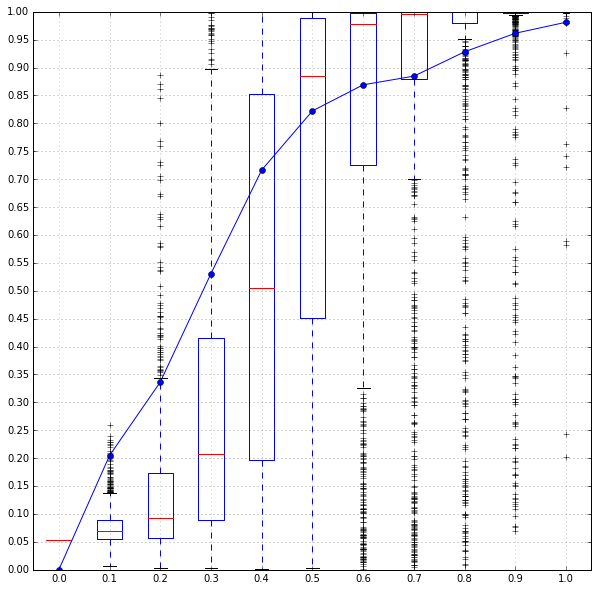

Class 14: pop bottle, soda bottle
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.18095238095238095, 0.2809786898184688, 0.4228855721393035, 0.5644768856447688, 0.7177615571776156, 0.7818329278183292, 0.8240064882400648, 0.851581508515815, 0.8548256285482563, 0.8686131386861314]


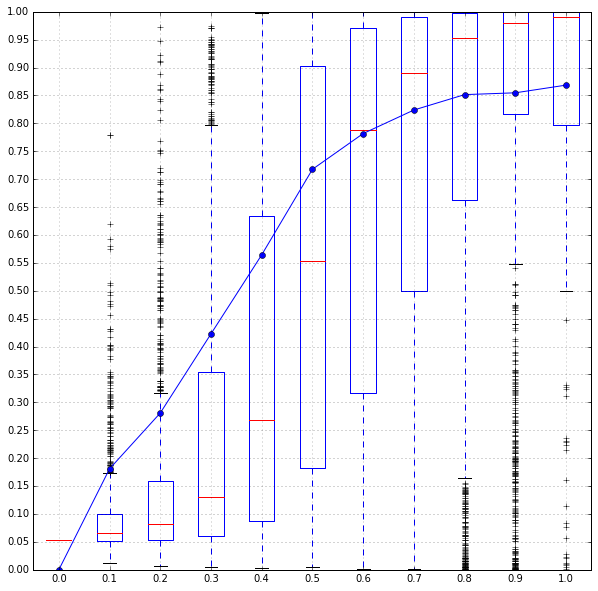

Class 15: revolver, six-gun, six-shooter
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.015657620041753653, 0.07266811279826464, 0.20425531914893616, 0.3576719576719577, 0.5026455026455027, 0.6550264550264551, 0.762962962962963, 0.8158730158730159, 0.8222222222222222, 0.8095238095238095]


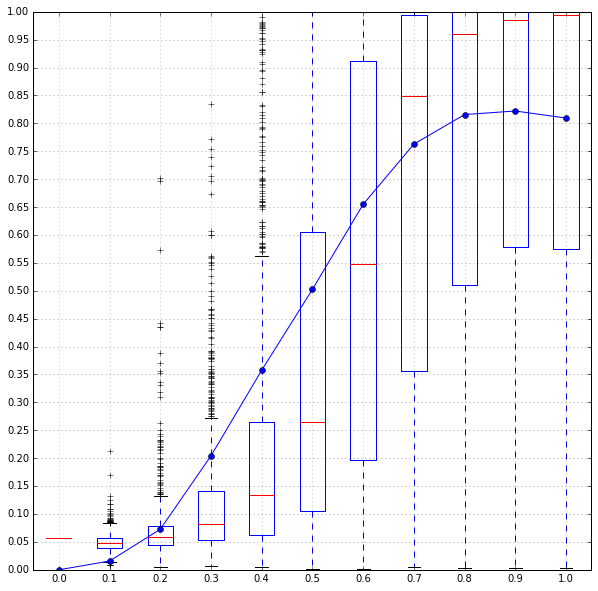

Class 16: switch, electric switch, electrical switch
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.10717529518619437, 0.3153070577451879, 0.4586739327883742, 0.5206611570247934, 0.5941230486685032, 0.6483011937557392, 0.7318640955004592, 0.797979797979798, 0.8264462809917356, 0.9008264462809917]


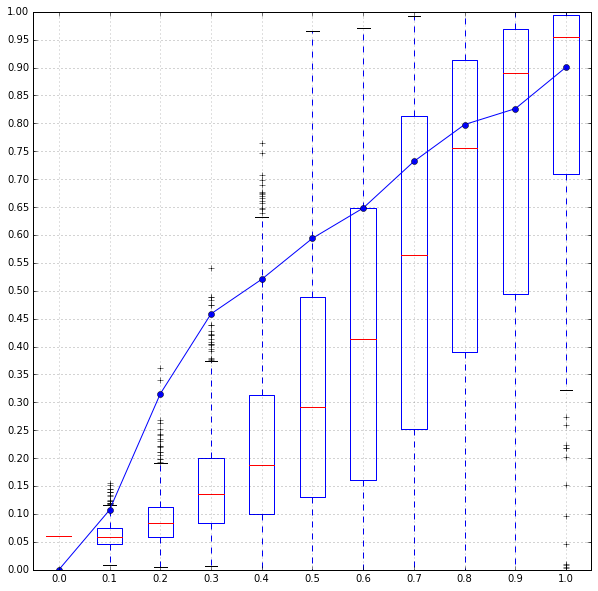

Class 17: tape player
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.11214953271028037, 0.21498371335504887, 0.37513171759747105, 0.4829059829059829, 0.6741452991452992, 0.7542735042735043, 0.813034188034188, 0.8589743589743589, 0.8888888888888888, 0.9038461538461539]


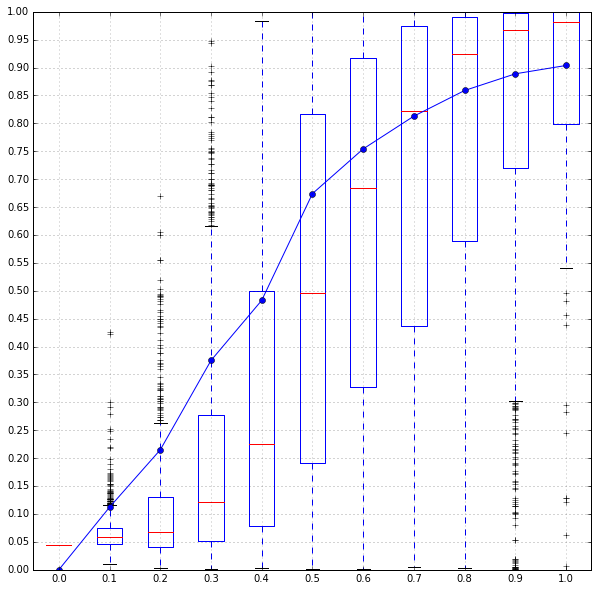

Class 18: wig
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.06572295247724974, 0.2344213649851632, 0.4120762711864407, 0.5671957671957671, 0.7026455026455026, 0.8275132275132275, 0.8984126984126984, 0.9343915343915344, 0.9566137566137566, 0.9809523809523809]


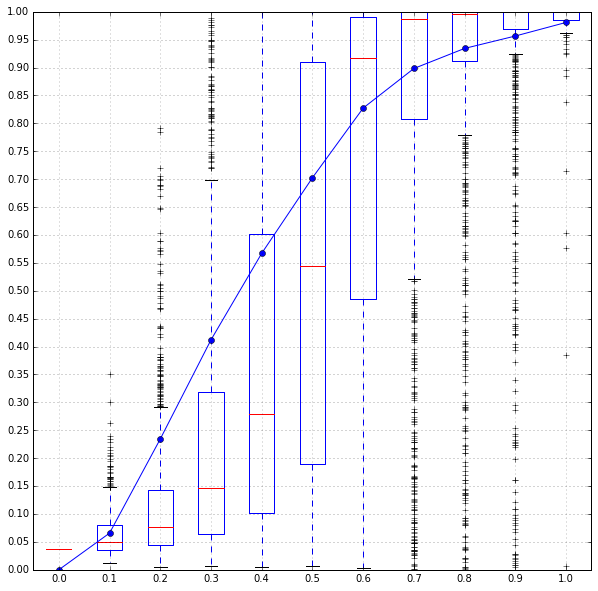

Class 19: bell pepper
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.0, 0.8150520416333067, 0.9067278287461774, 0.9407176287051482, 0.9572072072072072, 0.9684684684684685, 0.9744744744744744, 0.9834834834834835, 0.990990990990991, 0.990990990990991, 0.9932432432432432]


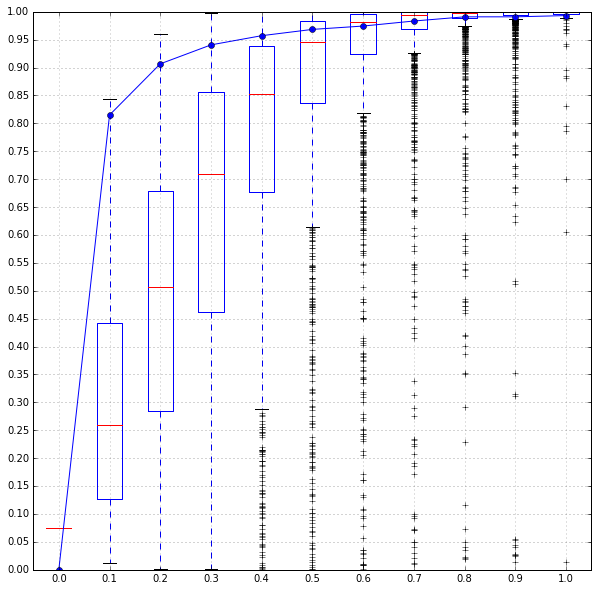

In [6]:
# Statistical analysis of probability.
from constant import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import cPickle
from IPython.display import Image, display

plt.rcParams['figure.figsize'] = (10, 10)

imagenet_labels_filename = caffe_root + 'data/ilsvrc12/synset_words.txt'
with open(imagenet_labels_filename) as f:
    lines = f.readlines()
id_to_name = {}
for i, line in enumerate(lines):
    wnid = line.split(' ')[0]
    name = line[(len(wnid) + 1):-1]
    id_to_name[i] = name

with open(result_root + 'test/top_images.pickle', 'rb') as f:
    top_images = cPickle.load(f)

test_dataset = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print "All classes: "
data = []
for i, test_size in enumerate(test_dataset):
    x = []
    for class_id in range(20):
        for probability, path in top_images[class_id][i]:
            x.append(probability)
    data.append(x)
# Grid.
ax = plt.gca()
ax.set_ylim([0, 1])
ax.set_yticks(np.arange(0, 1.05, 0.05))                                           
ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)                                           
ax.grid(which='both')                                                            
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)   
plt.boxplot(data)
ax.set_xticklabels(test_dataset)
plt.show()    

with open(result_root + 'test/class_accuracy.pickle', 'rb') as f:
    class_accuracy = cPickle.load(f)
    
test_label = [i + 1 for i in range(len(class_accuracy[0]))]

for class_id in range(20):
    print "Class {}: {}".format(class_id, id_to_name[new_to_original_class_id[class_id]])
    data = []
    for i, test_size in enumerate(test_dataset):
        x = []
        for probability, path in top_images[class_id][i]:
            x.append(probability)
        data.append(x)
    ax = plt.gca()
    ax.set_ylim([0, 1])
    ax.set_yticks(np.arange(0, 1.05, 0.05))                                           
    ax.set_yticks(np.arange(0, 1.05, 0.05), minor=True)                                           
    ax.grid(which='both')                                                            
    ax.grid(which='minor', alpha=0.2)                                                
    ax.grid(which='major', alpha=0.5)  
    plt.boxplot(data)
    print test_label
    print class_accuracy[class_id]
    plt.plot(test_label, class_accuracy[class_id], marker='o')
    ax.set_xticklabels(test_dataset)
    plt.show()
    
      
            